<div class="border-box-sizing" id="notebook" tabindex="-1">
<div class="container" id="notebook-container">
<div class="cell border-box-sizing text_cell rendered"><div class="prompt input_prompt">
</div><div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<div align="left"><b> IMT Mines Alès (2019-2020)</b></div>
</div>
</div>
</div>
<div class="cell border-box-sizing text_cell rendered"><div class="prompt input_prompt">
</div><div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p><a id="top"></a></p>
</div>
</div>
</div>
<div class="cell border-box-sizing text_cell rendered"><div class="prompt input_prompt">
</div><div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<div align="center">
<font face="Times" size="7">Analyse et calcul numériques<br/><br/>
    Exercices corrigés du TD3<br/></font><br/>
<font face="Times" size="4">P. Guyot, X. Picamoles, L. Pissot, E. Rousée</font>
</d
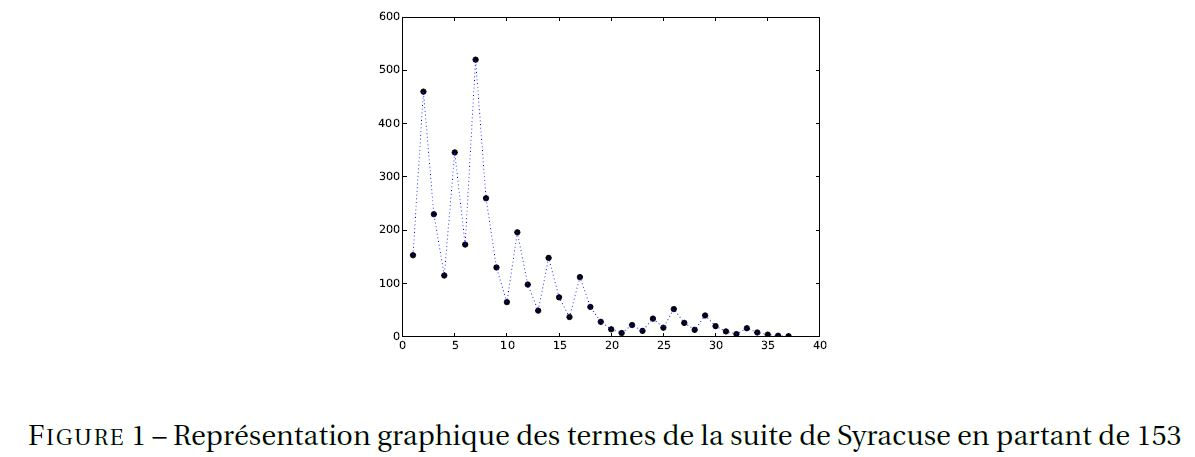
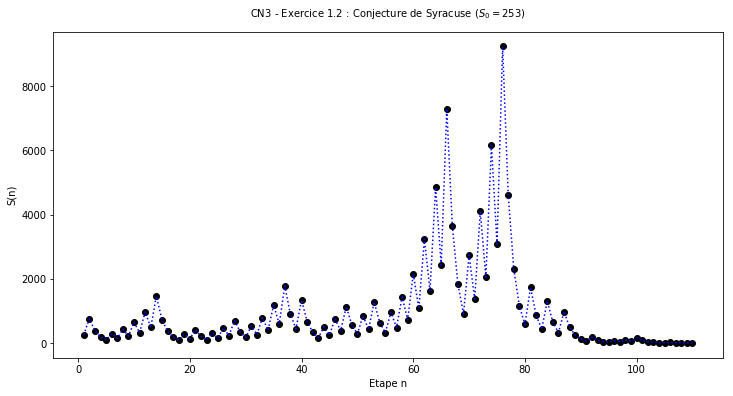
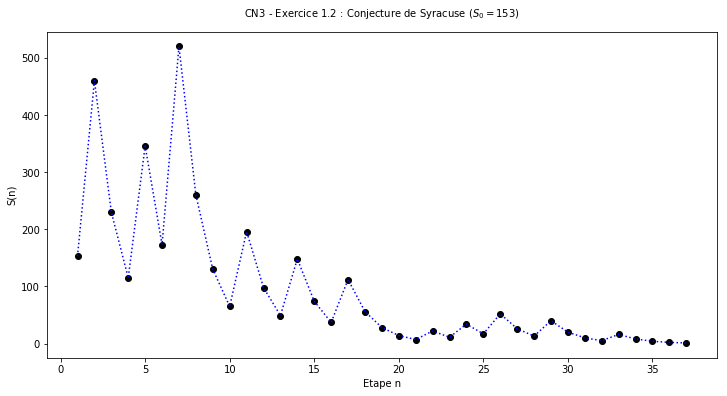
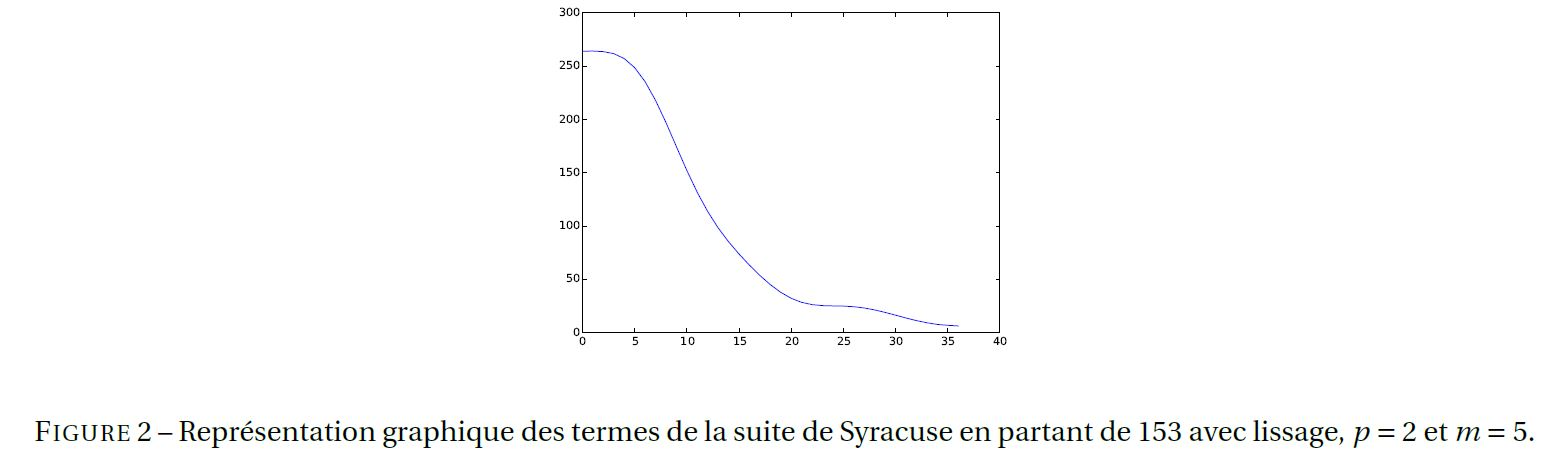
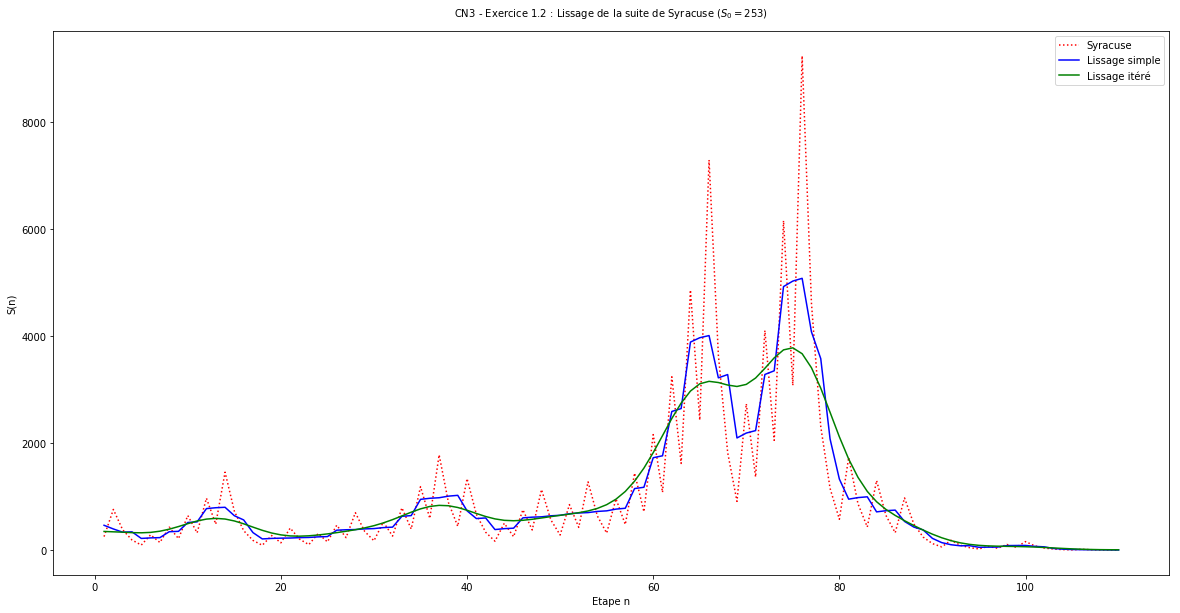

17160

In [1]:
from bs4 import BeautifulSoup
import json
import urllib.request
url = 'file:///Users/wenjing/Downloads/CN3_correction.html'
response = urllib.request.urlopen(url)
#  for local html file
# response = open("/Users/note/jupyter/notebook.html")
text = response.read()

soup = BeautifulSoup(text, 'lxml')
# see some of the html
print(soup.div)
dictionary = {'nbformat': 4, 'nbformat_minor': 1, 'cells': [], 'metadata': {}}
for d in soup.findAll("div"):
    if 'class' in d.attrs.keys():
        for clas in d.attrs["class"]:
            if clas in ["text_cell_render", "input_area"]:
                # code cell
                if clas == "input_area":
                    cell = {}
                    cell['metadata'] = {}
                    cell['outputs'] = []
                    cell['source'] = [d.get_text()]
                    cell['execution_count'] = None
                    cell['cell_type'] = 'code'
                    dictionary['cells'].append(cell)

                else:
                    cell = {}
                    cell['metadata'] = {}

                    cell['source'] = [d.decode_contents()]
                    cell['cell_type'] = 'markdown'
                    dictionary['cells'].append(cell)
open('notebook.ipynb', 'w').write(json.dumps(dictionary))